# Time series plotting around reservoirs

## To-dos
- [ ] sum precip from mm/hr to mm
- [x] spatial aggregation of GRACE subset to single time series
- [x] spatial aggregation of CYGNSS subset to single time series
- [x] spatial aggregation of IMERG subset to single time series
- [ ] convert time series functions & spatial functions to new class

In [1]:
func_dir = '/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/'

In [2]:
import sys
import pandas as pd
import numpy as np
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt

sys.path.append(func_dir)
import load_data
import time_series_calcs
import plotting_functions
import area_subsets
import area_calcs

In [3]:
grace_dict = load_data.load_GRACE()
res_shp = load_data.load_GRanD()

ERROR 1: PROJ: proj_create_from_database: Open of /global/home/users/ann_scheliga/.conda/envs/rioxarray_env/share/proj failed


In [4]:
def single_timeseries_CYGNSS_GRACE(dam_name,**plot_params):
    """
    Description
    -----------
    Hard-coded time series slicing for CYGNSS to start two months after the intersecting_timeframes() start date
    
    Inputs
    ------
    dam_name: name of a dam in the GRanD reservoir dataset
    subset_method : str
        default : 'polygon'
        accepted : 'polygon' , 'point'
        allows for updated polygon or older point-based subsetting
    **plot_params : dict
        dictionary of plot formatting options and labels
            Keys used: None, all passed to `three_part_timeseries`

    Outputs
    -------
    precip , fw , cmwe : Pandas Series
        Series used for plotting
        Respectively, precipitation, fractional water, TWS
    """
    global grace_dict, res_shp
    
    subset_gpd = area_subsets.check_for_multiple_dams(dam_name,res_shp)

    subset_bbox = subset_gpd.geometry.buffer(0).bounds
    fw_DA = load_data.load_CYGNSS_001_all_months(subset_bbox.values[0])
    fw_multi , fw_full = area_subsets.cygnss_shape_subset(
                         subset_gpd,
                         fw_DA,
                         buffer_val=0.1,
                         crs_code=4326)
    fw_binary = area_calcs.cygnss_convert_to_binary(fw_multi)
    fw_num = area_calcs.CYGNSS_001_areal_average(fw_binary)
    fw_full = pd.Series(data=fw_num, index=fw_full.index)

    cmwe_multi , mascon_ts , cmwe_full = area_subsets.grace_shape_subset(
                            subset_gpd,
                            grace_dict,
                            buffer_val=1)
    print(mascon_ts)

    fw , cmwe = time_series_calcs.intersecting_timeframes(fw_full,cmwe_full,buffer=0)
    fw = fw[2:]
    
    plot_params['data_labels'] = ['CYGNSS','GRACE-FO','']
    plot_params['x_label'] = 'Time'
    plot_params['y_labels'] = ['Fraction of surface water coverage', 'TWS water equivalence (cm)','']
    plot_params['line_fmt'] = ['b-','k-','k-']
    plot_params['figsize'] = (15,6)
    plot_params['grid'] = True
    plot_params['x_ticks'] = 'yearly'

    plt.rc('font', size=20)
    plt.rcParams['lines.linewidth'] = 2.5  
    plotting_functions.three_part_timeseries([fw , cmwe],**plot_params)

    return fw , cmwe

## Individual reservoirs

/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:220: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)
/global/home/users/ann_scheliga/.conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:179: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_poly = subset_gpd['geometry'].buffer(buffer_val).unary_union


Projected to equal area
        area_deg  area_km2   basin  elev_flag  labels  lat_center  lat_span  \
labels                                                                        
6667    1.002370  12404.16  5009.0        0.0  6667.0        27.0       1.0   
6683    1.001739  12397.52  5009.0        0.0  6683.0        26.0       1.0   
6822    1.000818  12387.25  5016.0        0.0  6822.0        25.0       1.0   
6823    0.999612  12373.42  5016.0        0.0  6823.0        24.0       1.0   
6866    1.001739  12397.52  5018.0        0.0  6866.0        26.0       1.0   
6867    1.000818  12387.25  5018.0        0.0  6867.0        25.0       1.0   
6868    0.999612  12373.42  5018.0        0.0  6868.0        24.0       1.0   
6993    1.000818  12387.25  5022.0        0.0  6993.0        25.0       1.0   
6994    0.999612  12373.42  5022.0        0.0  6994.0        24.0       1.0   
7018    1.001739  12397.52  5024.0        0.0  7018.0        26.0       1.0   
7022    1.000818  12387.25  

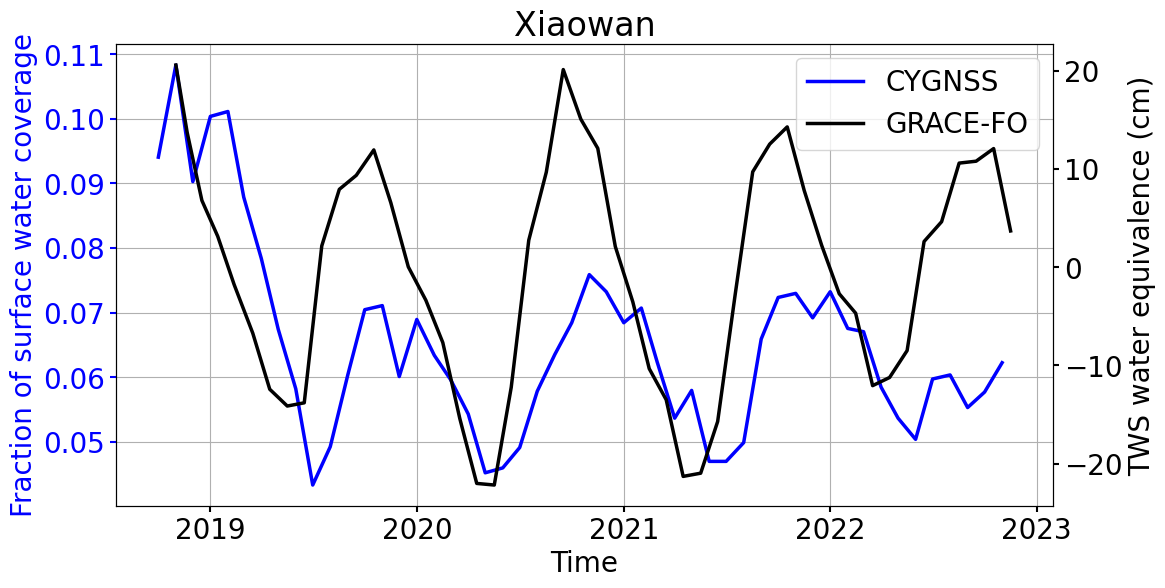

In [5]:
res_oi = 'Xiaowan'
plot_params = {
    'title' : res_oi
}
xiaowan_fw_series , xiaowan_cmwe_series = single_timeseries_CYGNSS_GRACE(
    res_oi,
    **plot_params)

/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:220: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  clip_rxr = full_rxr.rio.clip(subset_gpd.geometry.buffer(buffer_val) , subset_gpd.crs)
/global/home/users/ann_scheliga/.conda/envs/rioxarray_env/lib/python3.11/site-packages/xarray/core/duck_array_ops.py:188: RuntimeWarning: invalid value encountered in cast
  return data.astype(dtype, **kwargs)
/global/home/users/ann_scheliga/CYGNSS-GRACE/codebase/area_subsets.py:179: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shape_poly = subset_gpd['geometry'].buffer(buffer_val).unary_union


Projected to equal area
        area_deg  area_km2   basin  elev_flag  labels  lat_center  lat_span  \
labels                                                                        
6822    1.000818  12387.25  5016.0        0.0  6822.0        25.0       1.0   
6823    0.999612  12373.42  5016.0        0.0  6823.0        24.0       1.0   
6825    1.001141  12393.41  5016.0        0.0  6825.0        23.0       1.0   
6867    1.000818  12387.25  5018.0        0.0  6867.0        25.0       1.0   
6868    0.999612  12373.42  5018.0        0.0  6868.0        24.0       1.0   
6869    1.001141  12393.41  5018.0        0.0  6869.0        23.0       1.0   
6870    1.001141  12393.41  5018.0        0.0  6870.0        23.0       1.0   
6871    1.002348  12409.39  5018.0        0.0  6871.0        22.0       1.0   
6872    1.002348  12409.39  5018.0        0.0  6872.0        22.0       1.0   
6994    0.999612  12373.42  5022.0        0.0  6994.0        24.0       1.0   
6995    1.001141  12393.41  

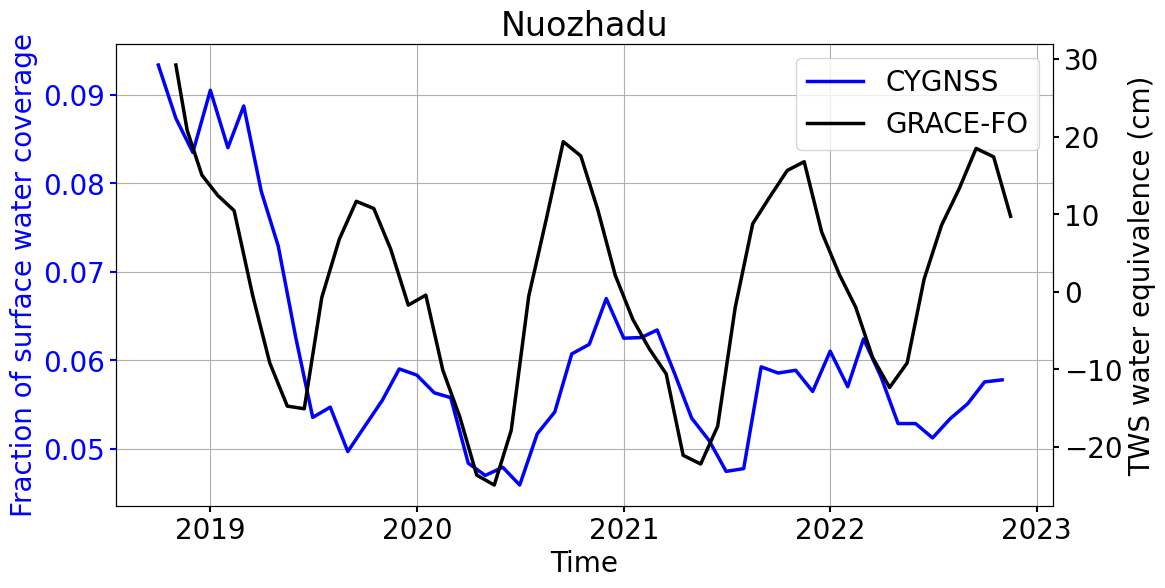

In [6]:
res_oi = 'Nuozhadu'
plot_params = {
    'title' : res_oi
}
nuozhadu_fw_series , nuozhadu_cmwe_series = single_timeseries_CYGNSS_GRACE(
    res_oi,
    **plot_params)

## Surface water

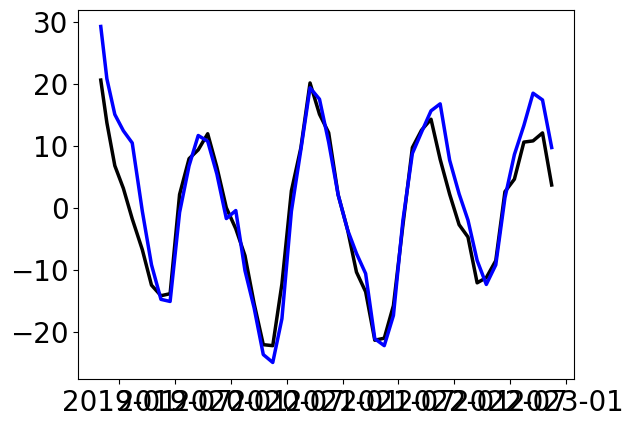

In [7]:
fig, axs = plt.subplots()

axs.plot(xiaowan_cmwe_series, 'k')
axs.plot(nuozhadu_cmwe_series , 'b')

## Older time series metrics from TSM class objects

In [8]:
def series_to_TSM_object(input_series,*TSM_args,**TSM_kwargs):
    series_obj = input_series.astype(float)
    series_obj.index = list(map(time_series_calcs.toYearFraction,series_obj.index))
    TSM_obj = time_series_calcs.TimeSeriesMetrics(series_obj,*TSM_args,**TSM_kwargs)
    return TSM_obj

In [9]:
def quick_quad_xcorr_figure(input3TSMs,**plot_params):
    fig , axs = plt.subplots(2,2,figsize=(16,16))
    
    #Seasonality plot
    input3TSMs[0].plot_seasonality(axs[0,0],color='k',label='GRACE-FO')
    input3TSMs[1].plot_seasonality(axs[0,0],color='b',label='CYGNSS')
#     input3TSMs[2].plot_seasonality(axs[0,0],color='c',label='IMERG')
    axs[0,0].set_ylabel('Normalized seasonality')
    
    short_axs_names = [tick.get_text()[:1] for tick in axs[0,0].get_xticklabels()]
    axs[0,0].set_xticklabels(short_axs_names)
    axs[0,0].set_ylim([-1.9,1.8])
    axs[0,0].grid()
    axs[0,0].legend(loc='upper center');
    
    #Anomalies plot
    input3TSMs[0].plot_anomalies(axs[0,1],color='k',label='GRACE-FO')
    input3TSMs[1].plot_anomalies(axs[0,1],color='b',label='CYGNSS')
#     input3TSMs[2].plot_anomalies(axs[0,1],color='c',label='IMERG')
    axs[0,1].set_ylabel('Normalized anomalies')
    axs[0,1].set_xticklabels(axs[0,1].get_xticklabels())
    axs[0,1].set_ylim([-2.2,3.2])
    axs[0,1].grid()
    axs[0,1].legend(loc='upper center');
    
    #Seasonality xcorr
    lag_x , lag_y = input3TSMs[1].cross_corr(input3TSMs[0],axs[1,0],ts_type='season',plot_on=False);
    axs[1,0].grid()
    axs[1,0].set_xticks(np.arange(-10,11,2))
    axs[1,0].set_ylabel('Linear correlation')
    axs[1,0].set_xlabel('Time lag (months)')
    
    #Anomalies xcorr
    lag_x , lag_y = input3TSMs[1].cross_corr(input3TSMs[0],axs[1,1],plot_on=False)
    axs[1,1].grid()
    axs[1,1].set_xticks(np.arange(-10,11,2))
    axs[1,1].set_ylabel('Linear correlation')
    axs[1,1].set_xlabel('Time lag (months)')
    
    plt.show()
# quick_quad_xcorr_figure([cmwe_ts,fw_ts,precip_ts])

In [10]:
def series_to_xcorr_fig(fw_series,cmwe_series):
    fw_ts = series_to_TSM_object(fw_series,'CYGNSS',remove_seasonality=True,zero_start=False,start_month=10)
    cmwe_ts = series_to_TSM_object(cmwe_series,'GRACE-FO',remove_seasonality=True,zero_start=False,start_month=10)
    quick_quad_xcorr_figure([cmwe_ts,fw_ts])

Calculating seasonality.
Calculating seasonality.
---cross correlation----
Between CYGNSS and GRACE-FO
Max correlation of 0.826 occurs with time shift of  2
---cross correlation----
Between CYGNSS and GRACE-FO
Max correlation of 0.651 occurs with time shift of  1


/tmp/ipykernel_12008/689709457.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(short_axs_names)
/tmp/ipykernel_12008/689709457.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels())


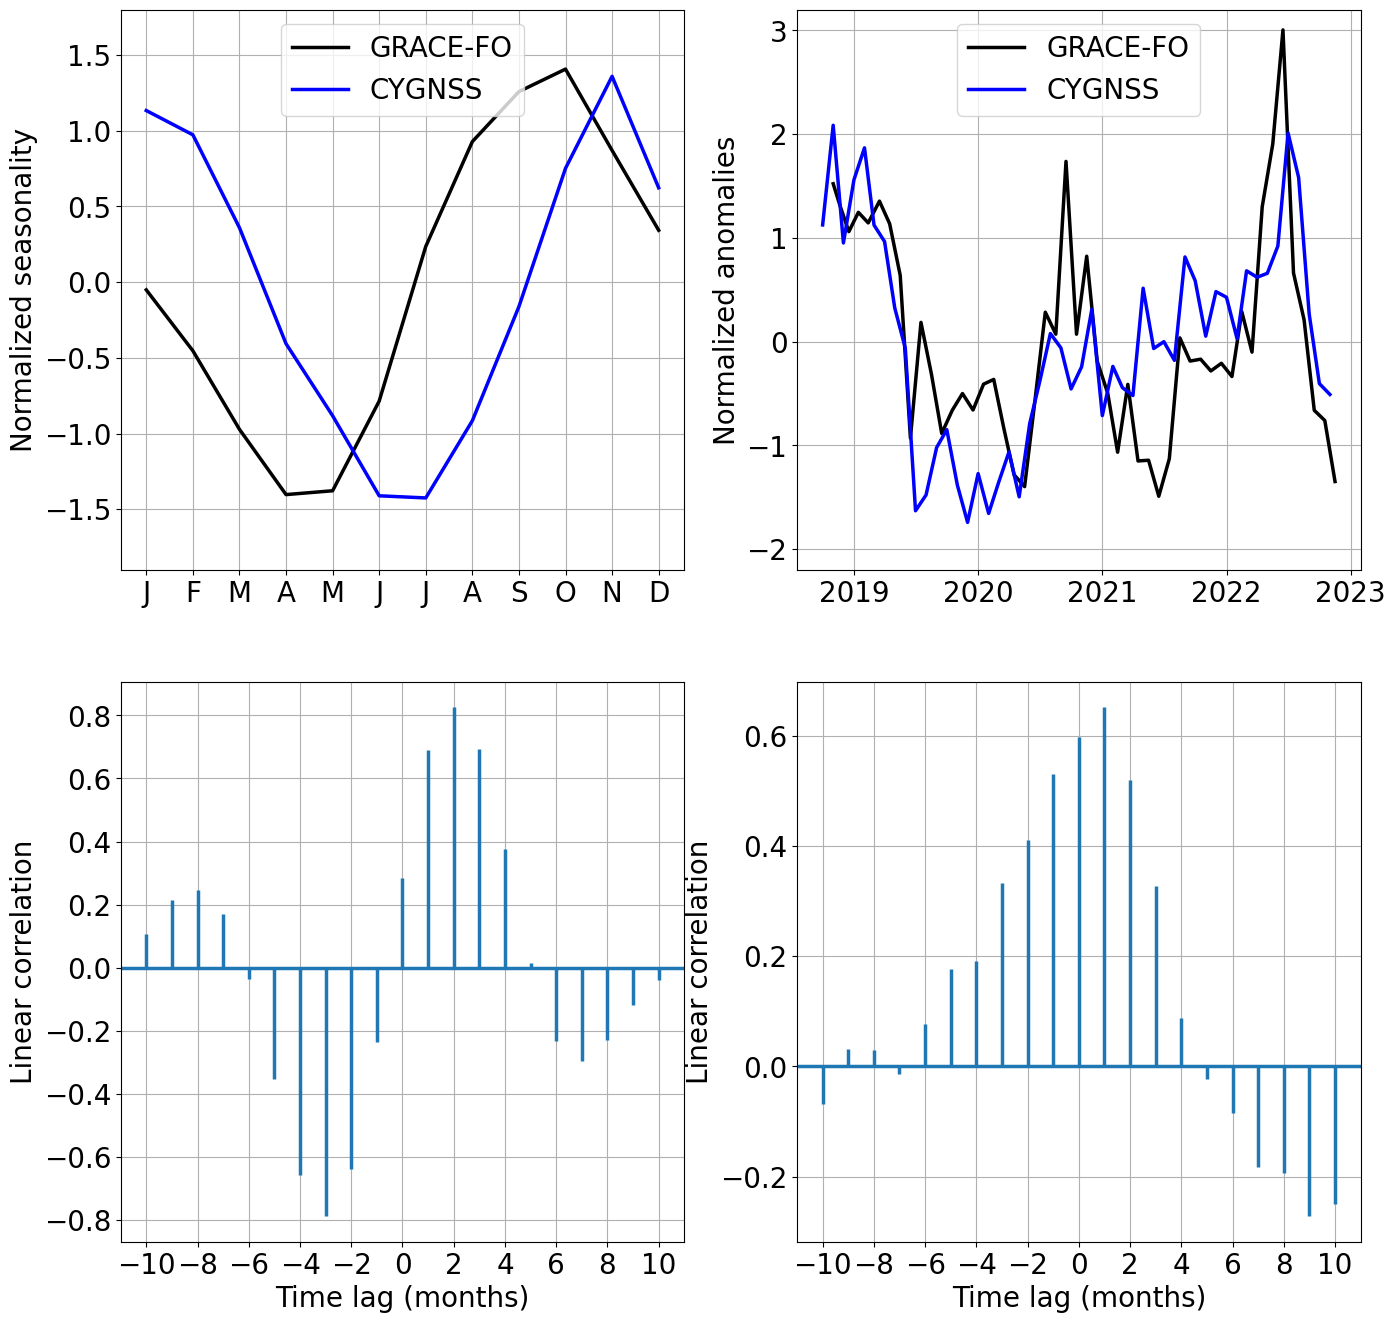

In [11]:
series_to_xcorr_fig(xiaowan_fw_series,xiaowan_cmwe_series)

Calculating seasonality.
Calculating seasonality.
---cross correlation----
Between CYGNSS and GRACE-FO
Max correlation of 0.773 occurs with time shift of  2
---cross correlation----
Between CYGNSS and GRACE-FO
Max correlation of 0.806 occurs with time shift of  0


/tmp/ipykernel_12008/689709457.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,0].set_xticklabels(short_axs_names)
/tmp/ipykernel_12008/689709457.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0,1].set_xticklabels(axs[0,1].get_xticklabels())


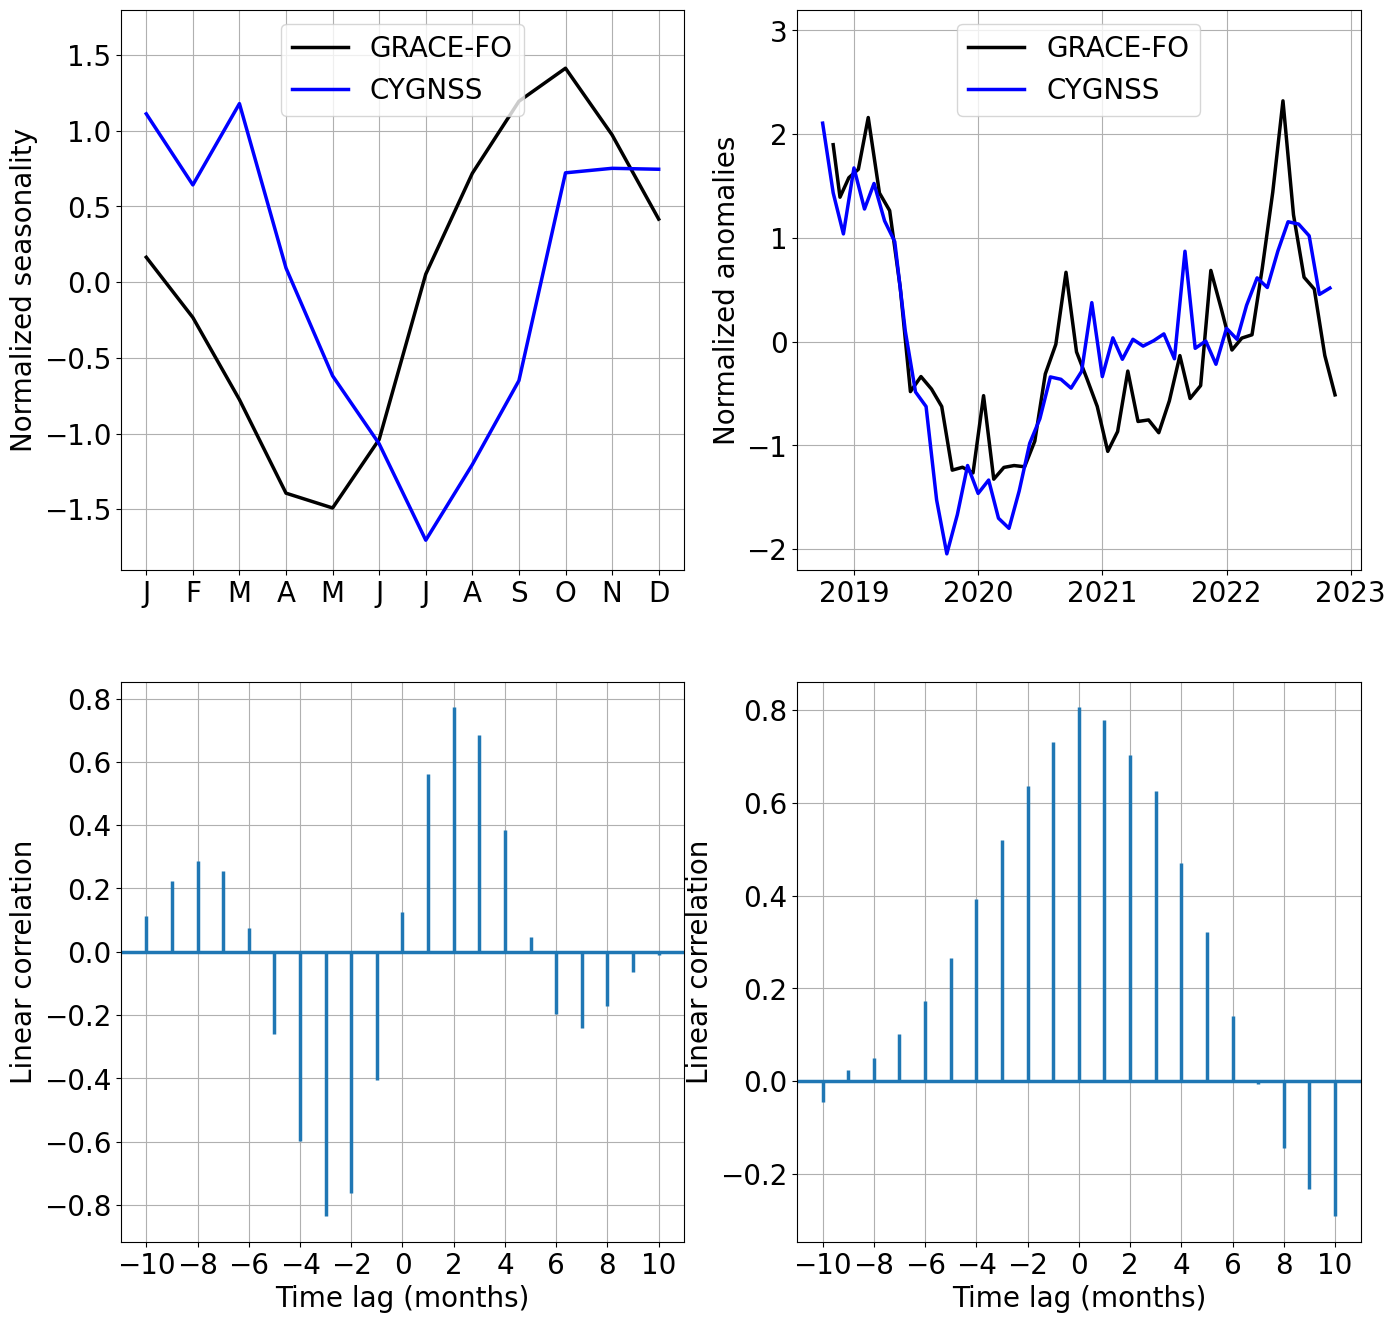

In [12]:
series_to_xcorr_fig(nuozhadu_fw_series,nuozhadu_cmwe_series)

In [13]:
shifted_fw_ts = time_series_calcs.normalize(pd.DataFrame(data = fw_ts.ts_detrend.values[:-7], index = fw_ts.ts_detrend.index[7:]))

NameError: name 'fw_ts' is not defined

In [ ]:
fig , ax = plt.subplots()
cmwe_ts.plot_anomalies(ax,color='k',label='GRACE')
ax.plot(shifted_fw_ts,color='b',label='CYGNSS')
ax.legend();
ax.grid()
ax.set_xlabel('GRACE timestep')
ax.set_ylabel('Normalized anomalies')
# ax.set_title('Shifted (-7 months) CYGNSS anomalies \ to max correlation with GRACE');

In [ ]:
# Goal plot anomalies with time lag applied
fig , ax = plt.subplots()
fw_ts.plot_anomalies(ax,color='b',label='CYGNSS')

In [ ]:
fig , ax = plt.subplots()
cmwe_ts.plot_seasonality(ax,color='k',label='GRACE')
fw_ts.plot_seasonality(ax,color='b',label='CYGNSS')
precip_ts.plot_seasonality(ax,color='c',label='IMERG')
ax.set_ylabel('Normalized seasonality')
ax.set_xticklabels(ax.get_xticklabels(),rotation=-90)
ax.grid()
ax.legend();

In [ ]:
print(cmwe_ts.lintrend_metrics)
fig , ax = plt.subplots()
cmwe_ts.plot_anomalies(ax,color='k',label='GRACE')
fw_ts.plot_anomalies(ax,color='b',label='CYGNSS')
precip_ts.plot_anomalies(ax,color='c',label='IMERG')
ax.legend();
ax.grid()

In [ ]:
fig , ax = plt.subplots()
lag_x , lag_y = cmwe_ts.cross_corr(precip_ts,ax,ts_type='season',plot_on=True)
lag_x , lag_y = fw_ts.cross_corr(cmwe_ts,ax,ts_type='season',plot_on=True);
lag_x , lag_y = fw_ts.cross_corr(precip_ts,ax,ts_type='season',plot_on=True)

In [ ]:
lag_x , lag_y = cmwe_ts.cross_corr(precip_ts,plot_on=True)
lag_x , lag_y = fw_ts.cross_corr(cmwe_ts,plot_on=True)
lag_x , lag_y = fw_ts.cross_corr(precip_ts,plot_on=True)

## Overview Map

In [ ]:
basin_res = res_shp.loc[res_shp['MAIN_BASIN']=='Mekong',['RES_NAME','DAM_NAME','RIVER','ADMIN_UNIT','CAP_MCM','AREA_SKM','MAIN_USE','geometry']]
basin_res.explore(height=500,width=450,popup='DAM_NAME',column='CAP_MCM',cmap='winter_r',
                legend = False,scheme='NaturalBreaks')

## Scratchwork

In [ ]:
grace_dict['mascon']